# Clustering  and Dimensionality Reduction

# Create example data for KMeans clustering from scratch
First, let's create some example data with 4 clusters using make_blobs.

We set random_state=1 so we all get the same clusters.

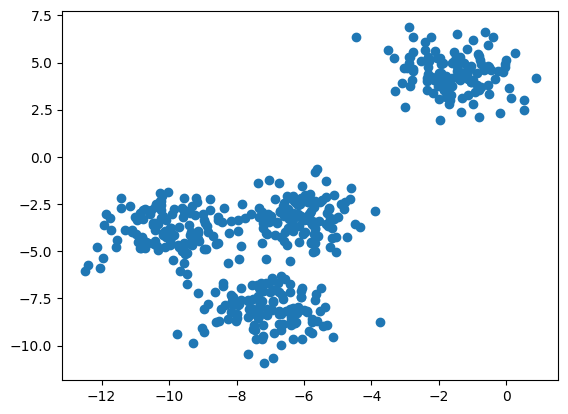

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
d1 = X[:,0] # first dimension
d2 = X[:,1] # second dimension
plt.scatter(d1,d2)
plt.show()

# We now write a function that initializes k centroids by randomly selecting them from the data points

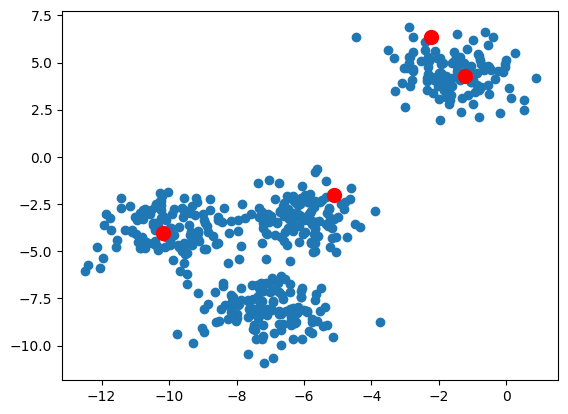

In [2]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

k = 4;
centroids = initialize_centroids(X, k)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

# We now write a function that initializes k centroids following kmeans++ approach

[[ -6.92324165 -10.66953197]
 [  0.2450988    5.51754657]
 [ -4.61767113  -1.67111145]
 [-10.47308538  -3.47573837]]


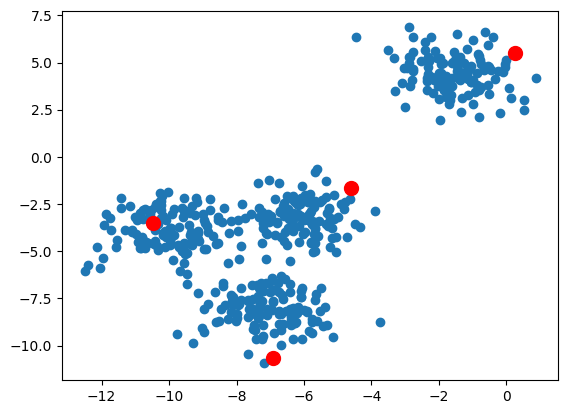

In [3]:
import scipy 
def initialize_centroids_plus_plus(X, K):
    '''
    Let D(x) - the shortest distance from a data point to the closest center we have already chosen
    # Take one center c1, chosen uniformly at random from X.
    # 1a. Take one center c1, chosen uniformly at random from X. 
    # 1b. Take a new center ci, choosing x ∈ X with probability proportional to D(x)^2
    # 1c. Repeat Step 1b. until we have taken k centers altogether.
    # 2-4. Proceed as with the standard k-means algorithm.
    '''
    # kMeans++: https://en.wikipedia.org/wiki/K-means%2B%2B
    
    C = [X[0]] # Take one center c1, chosen uniformly at random from X.
    indexes = [0]
    for k in range(1, K): # Take a new center ci
        D2 = np.array([min([np.inner(c-x,c-x) for c in C]) for x in X])
        probs = D2/D2.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()
        for j,p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        C.append(X[i])
        indexes.append(i)
    return indexes

k = 4;
indexes = initialize_centroids_plus_plus(X, k)
centroids = X[indexes]
print(centroids)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

# Now let's define a function that returns the closest centroid for each point. 

In [4]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    # points.shape -> (500, 2)
    # entroids.shape -> (4, 2) -> centroids[:, np.newaxis] (4, 1, 2)
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # (4 x 500)
    return np.argmin(distances, axis=0)

# extended resources: https://stackoverflow.com/a/41267079 on numpy broadcast

# We can test the code like so:

In [5]:
c = initialize_centroids(X, k)
closest_centroid(X, c)

array([1, 1, 3, 0, 3, 2, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 2, 1, 3, 3, 0, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0, 0,
       3, 3, 1, 3, 0, 0, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 0, 0, 3, 3, 0, 3,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 0, 0, 1, 0, 0, 1, 3, 0,
       1, 3, 2, 1, 3, 3, 0, 1, 1, 3, 1, 2, 2, 1, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 1, 0, 1, 1, 3, 0, 3,
       3, 1, 1, 3, 0, 3, 0, 0, 3, 1, 3, 0, 2, 0, 3, 3, 3, 1, 1, 3, 0, 3,
       0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 0, 1, 3, 3, 1, 0, 3,
       1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 3, 3, 1, 3, 0, 0, 3, 1, 3, 0, 3, 3,
       1, 0, 3, 1, 0, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 0, 3, 0,
       3, 3, 1, 3, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 0, 1, 3, 3, 0, 3, 2, 1, 1,
       0, 3, 1, 1, 1, 1, 3, 3, 0, 0, 3, 0, 1, 3, 0, 3, 0, 3, 1, 0, 1, 0,
       0, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3,

# The last step in the algorithm is to move the centroids to the mean location associated with it:

In [6]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    # points (500, 2), closest (500,) centroids (4, 2)
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

move_centroids(X, closest_centroid(X, c), c)

array([[-1.73618799,  4.58381015],
       [-9.28971805, -5.8672872 ],
       [-0.46337653,  3.09487339],
       [-6.62256163, -4.43561659]])

# We can visualize the first two steps in the following way:

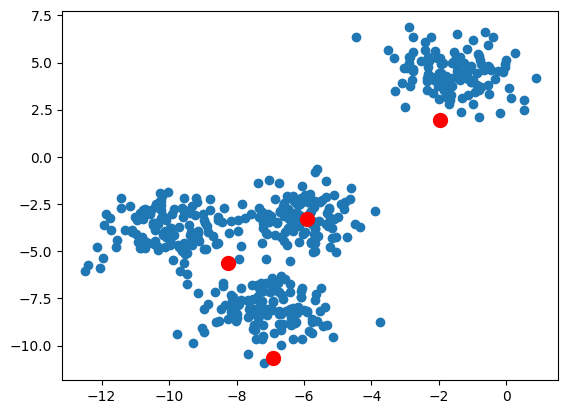

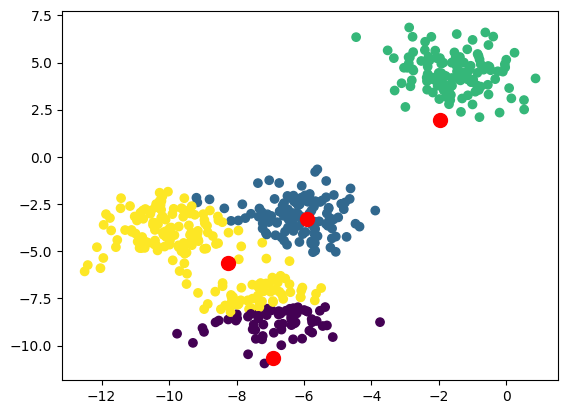

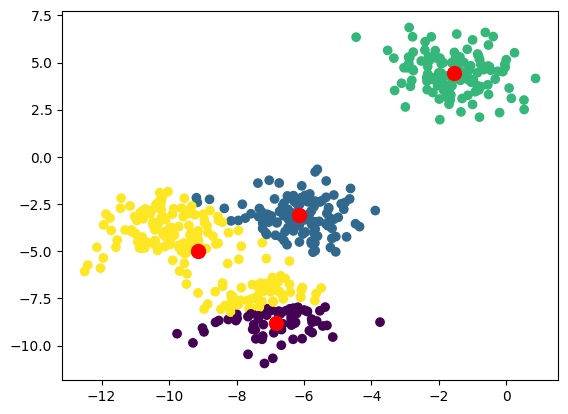

In [7]:
indexes = initialize_centroids_plus_plus(X, k)
centroids = X[indexes]
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

closest = closest_centroid(X, centroids)
plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

centroids = move_centroids(X, closest, centroids)
plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

# Now let's define a function that returns the distnace between two vectors

In [8]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.sqrt(((a - b)**2).sum())

# The complete algorithm

Distance between old and new centroids: 18.809939780627523
Distance between old and new centroids: 2.904823217223626
Distance between old and new centroids: 0.8729859387112912
Distance between old and new centroids: 0.04060349461811576
Distance between old and new centroids: 0.0


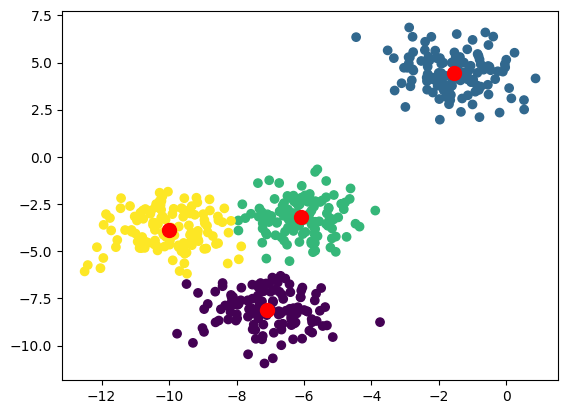

In [9]:
k = 4;
indexes = initialize_centroids_plus_plus(X, k)
centroids = X[indexes]
# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

d = dist(centroids, centroids_old)
print("Distance between old and new centroids:", d)

# Loop will run till the centroids do not change
while d != 0:
    # Storing the old centroid values
    centroids_old = centroids
    # Assigning each value to its closest cluster
    closest = closest_centroid(X, centroids)
    # Finding the new centroids by taking the average value
    centroids = move_centroids(X, closest, centroids)
    # update the error
    d = dist(centroids, centroids_old)  
    print("Distance between old and new centroids:", d)

plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

# KMeans using sklearn


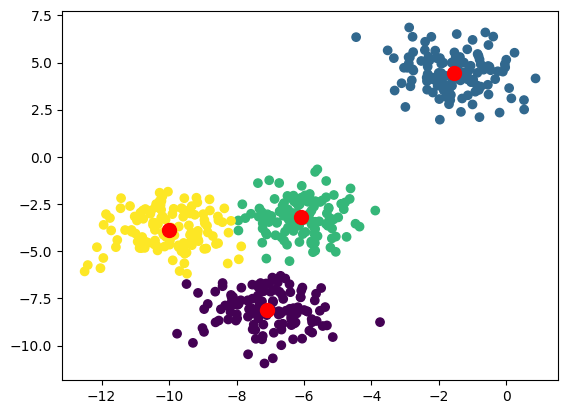

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
from collections import Counter

estimator = KMeans(init='k-means++', n_clusters=4, n_init=10)
estimator.fit(X)
closest = closest_centroid(X, estimator.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], c='r', s=100)
plt.show()

# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## EXERCISE: Clustering with k-means

[Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#example-cluster-plot-kmeans-digits-py]

### Loading handwritten digits data

We'll work with the handwritten digits dataset, a classic machine-learning dataset used to explore automatic recognition of handwritten digits (i.e., 0, 1, 2, ..., 9).

For more information:
* http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
* http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

The digits data comprises 1797 64-dimensional representations of handwritten digits:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

It also includes labels:
[0 1 2 ... 8 9 8]

And it includes the original 8x8 image representation:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Let's look at a few images:


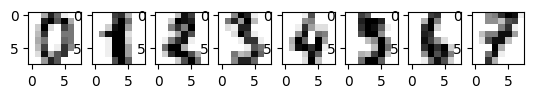

In [11]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

print('The digits data comprises {} {}-dimensional representations of handwritten digits:\n{}\n'.format(
        digits.data.shape[0],
        digits.data.shape[1],
        digits.data
    ))

print('It also includes labels:\n{}\n'.format(digits.target))

print('And it includes the original 8x8 image representation:\n{}\n'.format(digits.images[0]))

print('Let\'s look at a few images:')
NUM_SUBPLOT_ROWS = 1
NUM_SUBPLOT_COLS = 8
for i in range(NUM_SUBPLOT_ROWS*NUM_SUBPLOT_COLS):
    plt.subplot(NUM_SUBPLOT_ROWS,NUM_SUBPLOT_COLS,i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

### Clustering handwritten digits

That's the data. Now let's try clustering these 64d vectors.

`scikit-learn` implements many differnt machine learning algorithms.

The normal pattern is to:
1. intialise an estimator (e.g., `estimator = KMeans()`)
1. fit to the training data (e.g., `estimator.fit(training_data)`)
1. label the test data (e.g., `estimator.predict(test_data)`)

For clustering, we don't have separate training and test data.

So the labelling is created when we fit and accessed by `estimator.labels_`.

`estimator.inertia_` gives the sum of squared errors (SSE).

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
from collections import Counter

# First let's scale the digits data (center to mean and scale to unit variance)
data = scale(digits.data)
print('Scaled digits data:\n{}\n'.format(data))

# Let's grab the data we'll need
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target)) # classes
labels = digits.target
freq = Counter(labels)
print('Label counts for each digit:', sorted(freq.items()))

# And let's run k-means, specifying initialisation (k-means++), k (n_digits), and the number of runs (10)
estimator = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
estimator.fit(data)
print('Sum of squared errors:', estimator.inertia_)

Scaled digits data:
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]

Label counts for each digit: [(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]
Sum of squared errors: 69463.97483569324


### TODO Try different initialisations

Initialisation has a large effect on cluster output. Let's try a few options.

* Initialise with random (`init='random'`)
* Run PCA with k components (`pca = PCA(n_components=n_digits).fit(data)`)
* Use PCA components to initialise (`init=pca.components_`)
* Can we determine which approach is best?

In [13]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

from sklearn.decomposition import PCA

data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target)) # classes
labels = digits.target

estimator = KMeans(init='random', n_clusters=n_digits, n_init=10)
estimator.fit(data)
print('Sum of squared errors:', estimator.inertia_)

pca = PCA(n_components=n_digits).fit(data)
estimator = KMeans(init=pca.components_, n_clusters=n_digits, n_init='auto')
estimator.fit(data)
print('Sum of squared errors:', estimator.inertia_)

Sum of squared errors: 69703.24925880176
Sum of squared errors: 70768.3362457125


## EXERCISE: Evaluating clustering

Since we have a gold-standard labels, we can compare our system clustering to the true partition.

`scikit-learn` includes various metrics for this:
* Homogeneity
* Completeness
* V-measure
* Adjusted Rand index (ARI)
* Adjusted mutual information (AMI)
* Silhouette coefficient

For more information:
* http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Let's compare the above clusterings using V-measure.

In [14]:
from sklearn import metrics
print('k-means++ initialisation:', metrics.v_measure_score(labels, estimator.labels_))

k-means++ initialisation: 0.6810493700809453


### Comparing initialisations

Let's be a bit more exhaustive, comparing initialisations using variuos evaluation metrics.

In [15]:
from time import time
from sklearn.decomposition import PCA

sample_size = 300

def bench_k_means(estimator, name, data):
    "Calculate various metrics for comparing system clustering to a gold partition"
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

# print table header
print(75 * '_')
print('init         time  inertia    homo   compl  v-meas     ARI     AMI silhouet')
print(75 * '_')

# benchmark k-means++ initialisation
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

# benchmark random initialisation
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# benchmark PCA initalisation
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based", data=data)

print(75 * '_')

___________________________________________________________________________
init         time  inertia    homo   compl  v-meas     ARI     AMI silhouet
___________________________________________________________________________
k-means++   0.10s    69662   0.677   0.715   0.696   0.567   0.693    0.139
   random   0.08s    69415   0.597   0.646   0.620   0.459   0.616    0.134
PCA-based   0.01s    70679   0.676   0.705   0.690   0.560   0.687    0.125
___________________________________________________________________________


### TODO Reading evaluation output

- Which approach performs best? How would you order the other two?
- Do you neighbours get the same result?

AS for the time efficiency, PCA-based > random > k-means++

Completeness and Homogeneity are two objects (higher is better)

homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

V-measure as the harmonic mean of homogeneity and completeness.

Silhouette Coefficient: If the ground truth labels are not known, evaluation must be performed using the model itself.

Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

The adjusted mutual information can then be calculated using a similar form to that of the adjusted Rand index

## EXERCISE: Choosing k

### Create example data for choosing k

First, let's create some example data with 4 clusters using make_blobs.

We set `random_state=1` so we all get the same clusters.

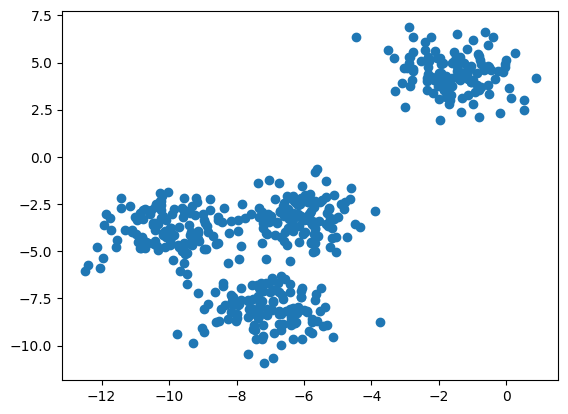

In [16]:
from sklearn.datasets import make_blobs

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
d1 = X[:,0] # first dimension
d2 = X[:,1] # second dimension
plt.scatter(d1, d2)

### Choosing k using silhouette analysis

For good clusterings:
* the average silhouette should be close to 1 indicating that points are far away from neighbouring clusters 
* all cluster silhouettes should be close to the average silhouette score

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


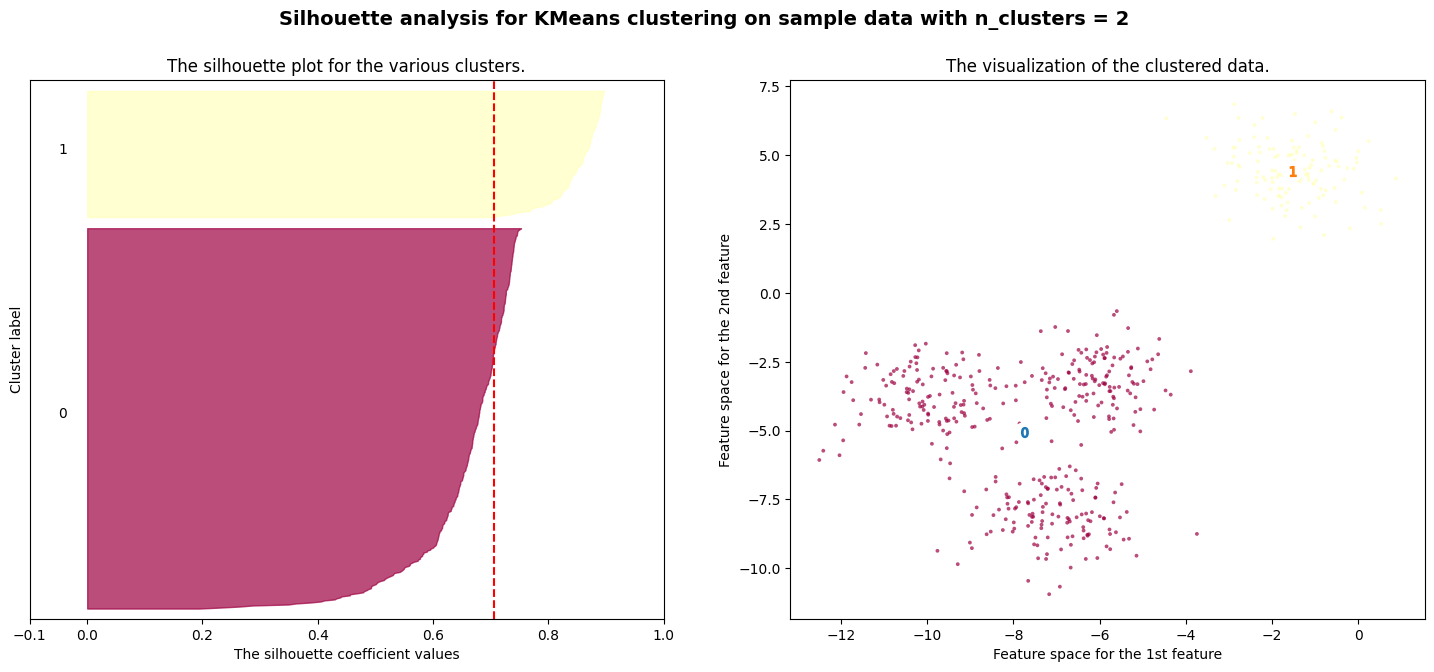

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


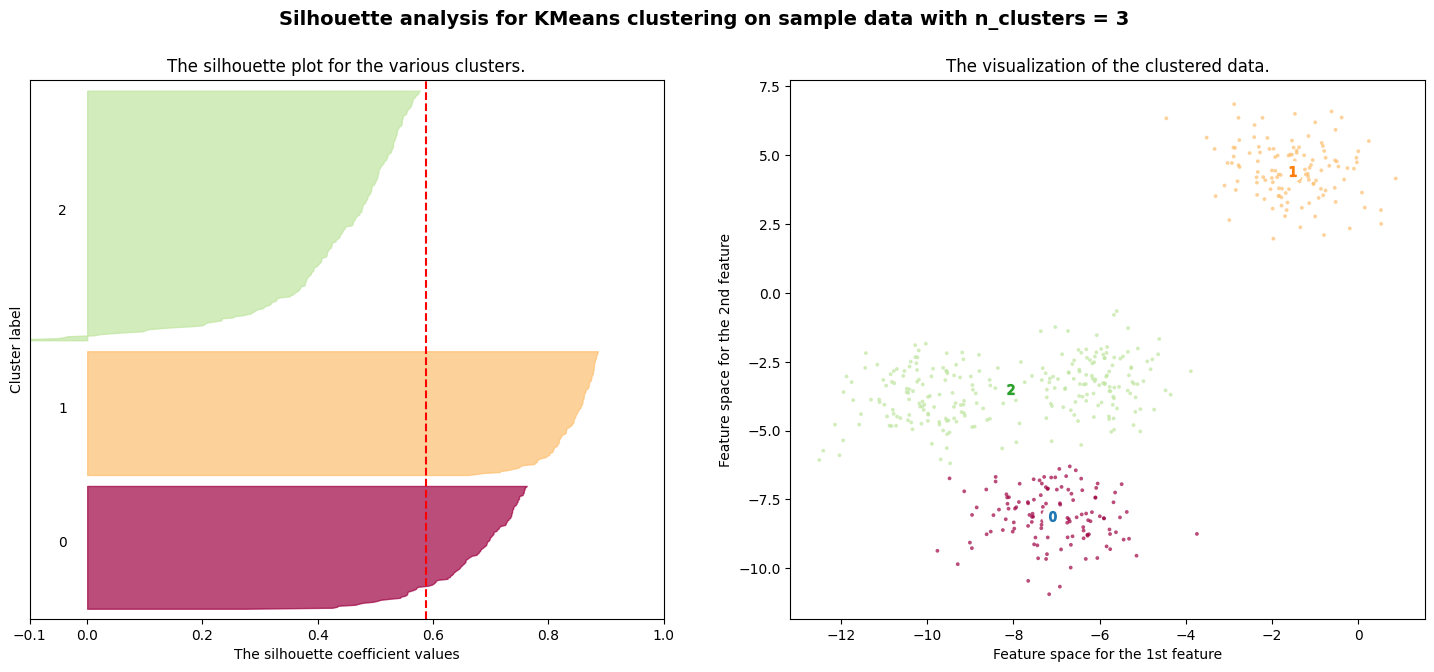

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


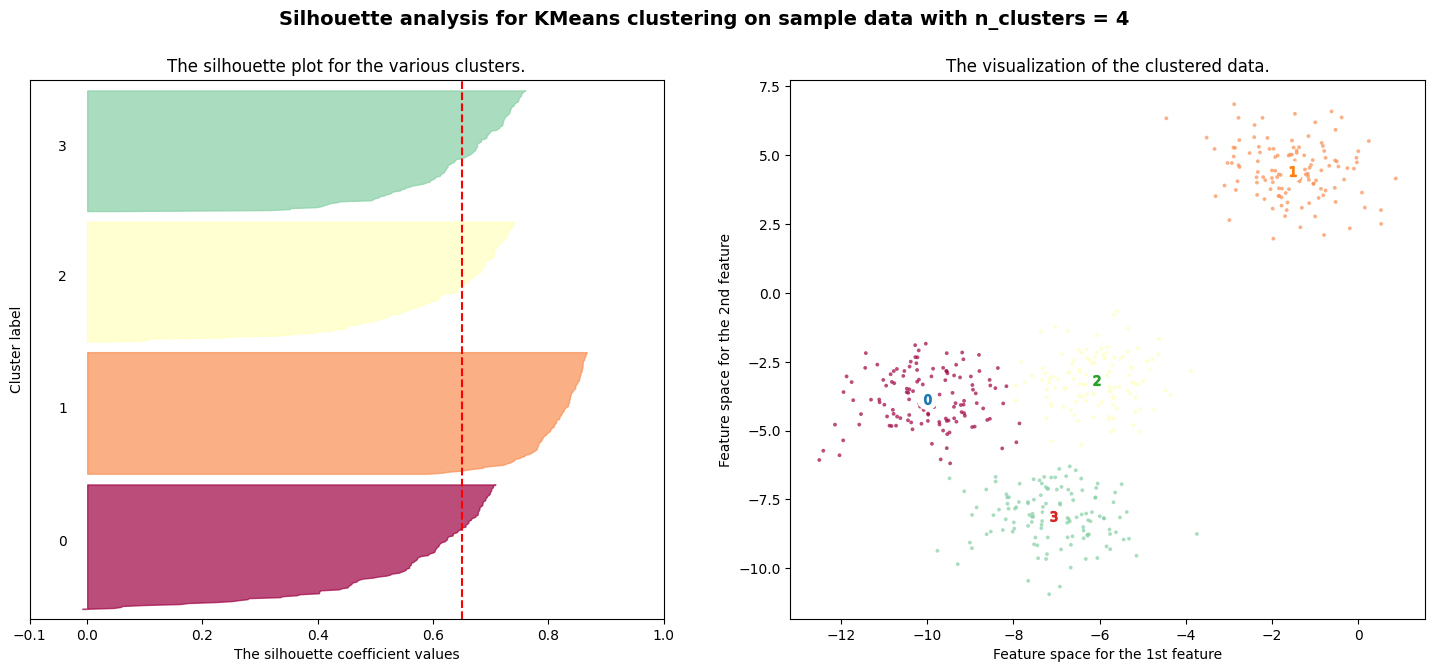

For n_clusters = 5 The average silhouette_score is : 0.561464362648773


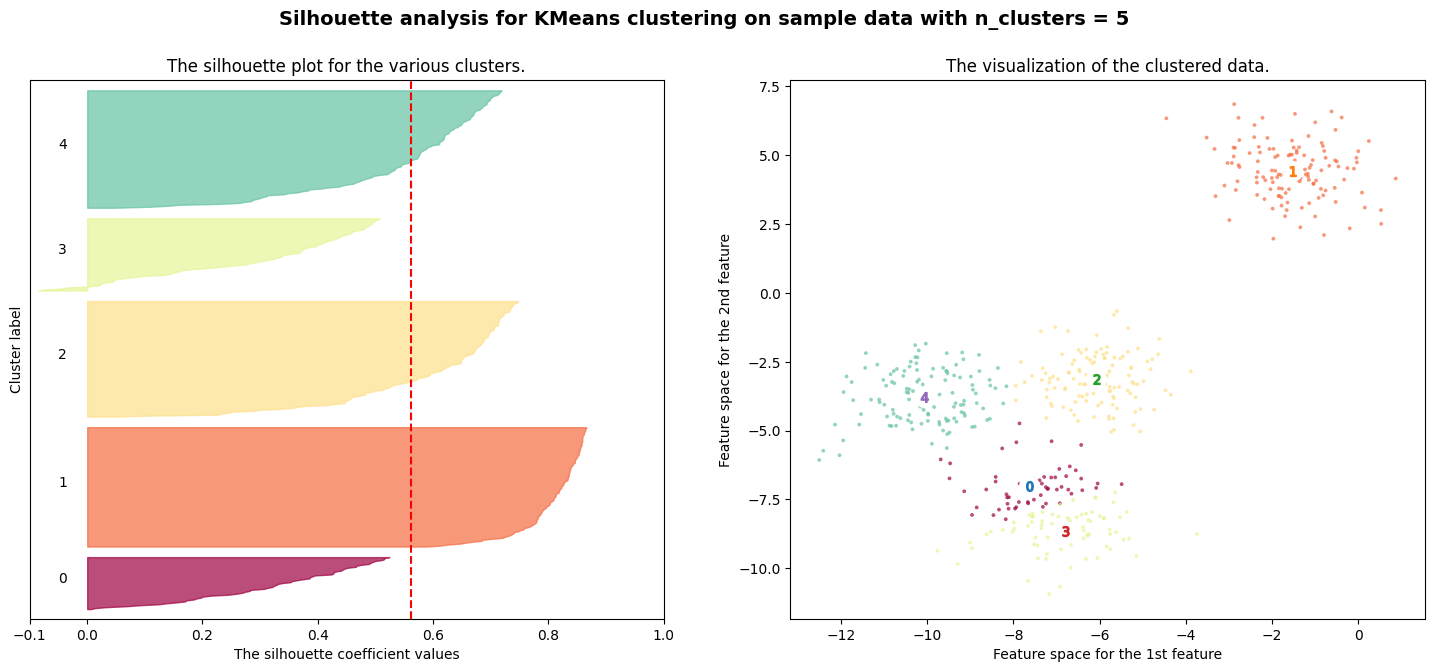

For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


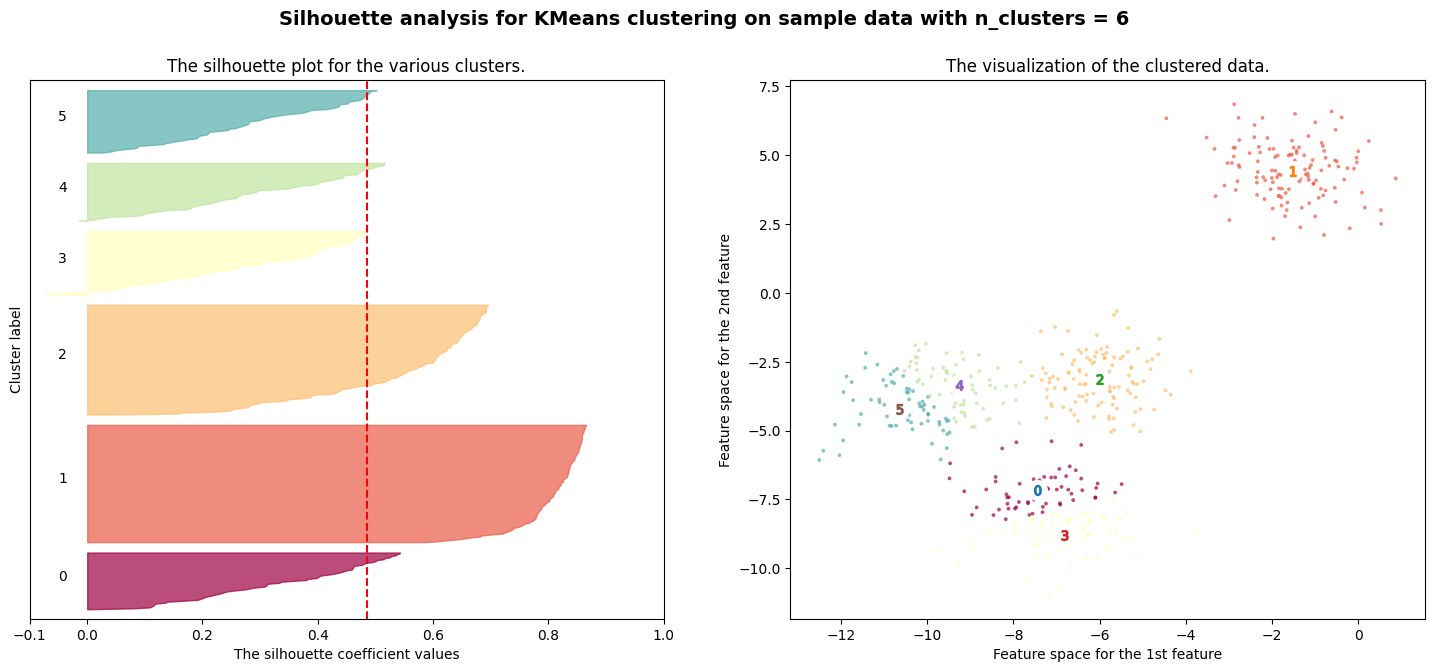

In [17]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

import matplotlib.cm as cm
range_n_clusters = range(2,7)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1, but in this example 
    # all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### TODO Choosing k

[Derived from Data Science from Scratch, Chapter 20]

- Plot inertia against k for k from 2 to 6
- What k would you choose?

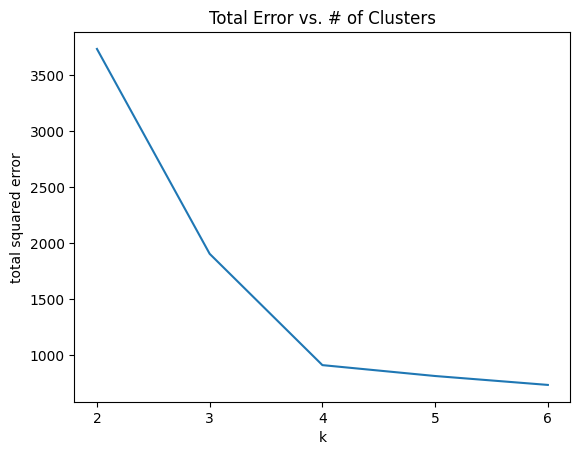

In [18]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

from sklearn.cluster import KMeans

ks = range(2,7)
errors = []
for k in ks:
    estimator = KMeans(init='k-means++', n_clusters=k, n_init=10)
    estimator.fit(X)
    errors.append(estimator.inertia_)

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

# EXERCISE: Dimensionality Reduction

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import scale

## Principal component analysis (PCA)

In [20]:
iris = datasets.load_iris()
print('The iris data comprises {} {}-dimensional representations of Iris flower.'.format(
        iris.data.shape[0],
        iris.data.shape[1]
    ))
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

The iris data comprises 150 4-dimensional representations of Iris flower.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
df_iris = df_iris.astype({'target': 'int32'})
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
# Let's grab the data we'll need
n_classes = len(np.unique(iris.target_names)) # classes
print("Number of classes = ",n_classes)
labels = iris.target

Number of classes =  3


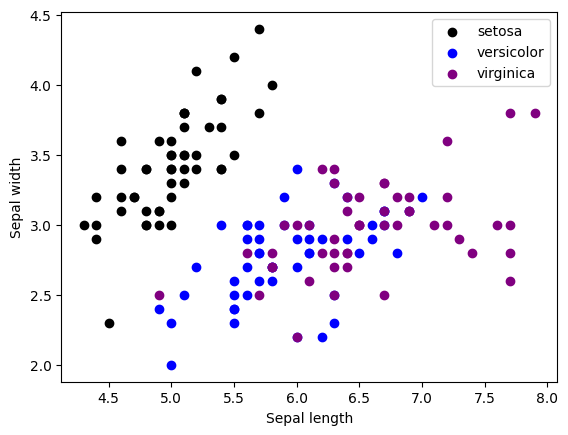

In [23]:
#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#Plot the initial training points using sepal length vs sepal width

# Plot the training points
def plot_scatter(X,y,labels,colors):
    for i in range(len(colors)):
        px = X[:, 0][y == i]
        py = X[:, 1][y == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(labels)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Let's see how the data looks like
colors = ['black', 'blue', 'purple']  
plot_scatter(iris.data, iris.target, iris.target_names, colors)

variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
var: [0.73  0.959 0.996 1.001]


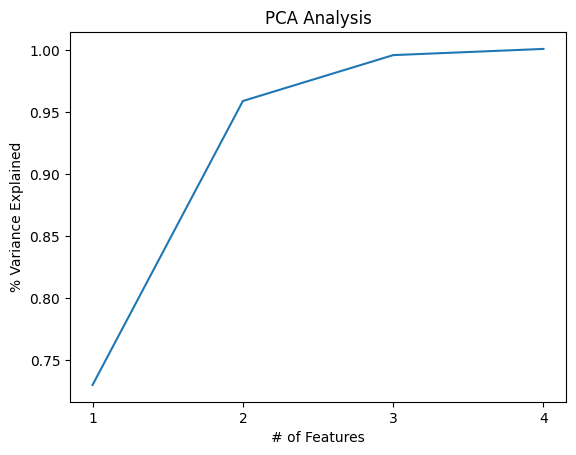

In [24]:
# let's apply PCA on the data and reduce its dimensionality
# doc: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA()
data = scale(iris.data)
iris_pca = pca.fit_transform(data)
#Explained variance ratio
print('variance ratio:', pca.explained_variance_ratio_)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
print('var:', var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.xticks([0,1,2,3], [1,2,3,4])
plt.show()

### Deciding how many componenets
The output of the explained variance shows  that the first component explains 72.8%  of the data set's variation. That means it holds 72.8% of the data's information in one principal component. And by taking the first two components, we only exclude 4.2% of the data set's information and the first two components  contain 95.8% of the iris data set's original information.


In [25]:
pca = PCA(n_components=2)
data = scale(iris.data)
iris_pca = pca.fit_transform(data)
comps = pd.DataFrame(data = iris_pca, columns = ['pc 1', 'pc 2'])
print(comps.head(5))

final_comps = pd.concat([comps, pd.DataFrame(data=labels,columns=['target'])], axis = 1)
print(final_comps.head(5))

       pc 1      pc 2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835
       pc 1      pc 2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0


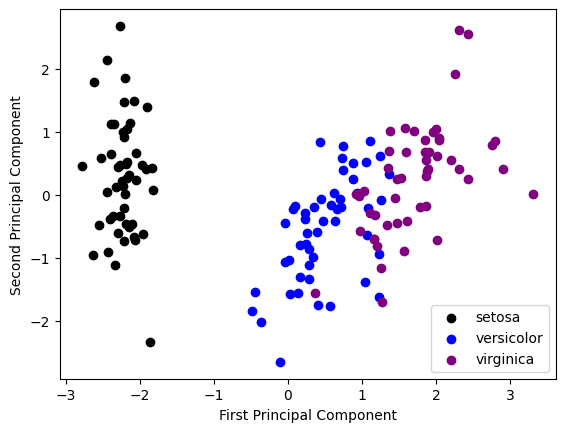

In [26]:
# Plot the training points
def plot_pca_scatter(X,y,labels,colors):
    for i in range(len(colors)):
        px = X[:, 0][y == i]
        py = X[:, 1][y == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(labels)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Plot the training points after PCA
colors = ['black', 'blue', 'purple']  
plot_pca_scatter(iris_pca, iris.target, iris.target_names, colors)

### TODO PCA on digits dataset
* Load digits dataset 
* Scale the data
* Apply PCA
* What would be a reasonable number of components for digits  data?

var: [0.12  0.216 0.3   0.365 0.414 0.456 0.495 0.529 0.559 0.588 0.616 0.642
 0.665 0.687 0.709 0.728 0.746 0.762 0.778 0.793 0.806 0.819 0.831 0.842
 0.852 0.861 0.87  0.878 0.886 0.893 0.9   0.907 0.914 0.92  0.926 0.932
 0.937 0.942 0.947 0.951 0.955 0.959 0.963 0.966 0.969 0.972 0.975 0.978
 0.981 0.983 0.985 0.987 0.989 0.991 0.993 0.995 0.996 0.997 0.998 0.999
 1.    1.    1.    1.   ]


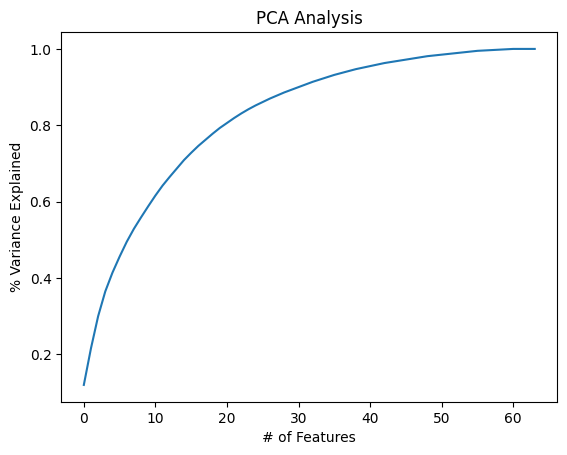

In [27]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

pca = PCA()
data = scale(digits.data)
digits_pca = pca.fit_transform(data)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
print('var:', var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

# End of Tutorial. Many Thanks.